# Language detection LSTM

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## import data

In [8]:
from Dataset import  Languages_Dataset, loadData, languages
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

X,y = loadData()

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.15)
dataset = Languages_Dataset(X_train, y_train)


## Net

In [ ]:
from Net import Net
import os

vocab_size = 27
embedding_dim = 64
hidden_size = 128
num_layers = 2
output_size = len(languages)

model = Net(vocab_size, embedding_dim, hidden_size, output_size, num_layers).to(device)
if os.path.exists(path:="model.pth"):
    print("Model loaded")
    model.load(path)
else:
    print("No file to load")

No file to load


## training

Epoche: [1/1]   Batch: [379/379]   Loss: 0.2536045015

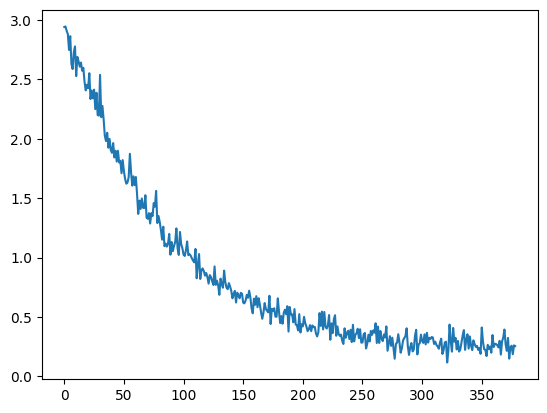

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(epochs):
    model.train()
    dataloader = DataLoader(dataset, batch_size=256, shuffle=True, collate_fn=dataset.collate_fn)
    l = len(dataloader)
    loss_list = []
    for epoch in range(epochs):
        for i, (inputs, targets, lengths) in enumerate(dataloader):
            inputs:torch.Tensor; targets: torch.Tensor; lengths:torch.Tensor
            inputs, targets, lengths = inputs.to(device), targets.to(device), lengths.to(device)
            model.zero_grad()
            outputs = model(inputs, lengths)
            loss:torch.Tensor = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.item())
            print("\r"+f"Epoche: [{epoch+1}/{epochs}]   Batch: [{i+1}/{l}]   Loss: {loss.item():.10f}", flush=True, end="")
    return loss_list

plt.plot(train(1))

In [11]:
model.save("model.pth")

# testing

average success rate: 92.54 %


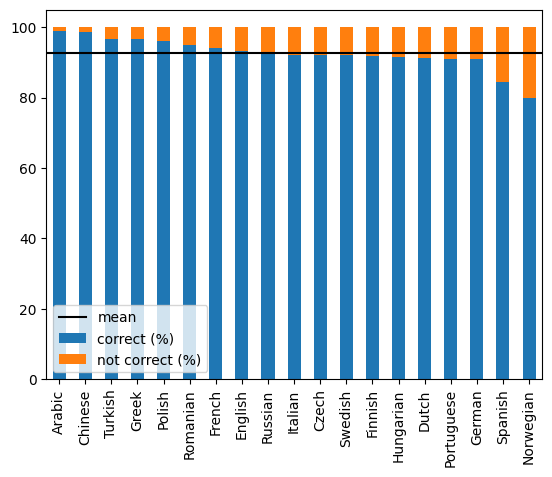

In [12]:
import pandas as pd

def test():
    model.eval()
    predictions = {}
    dataset = Languages_Dataset(X_test, y_test)
    
    for inp, target, length in dataset:
        lang = languages[target.argmax().item()]
        outp = model.predict(inp[:length])
        i = outp.argmax().item() 
        j = target.argmax().item()
        if i==j:
            predictions.setdefault(lang, {"correct": 0, "not correct": 0})["correct"] += 1
        else:
            predictions.setdefault(lang, {"correct": 0, "not correct": 0})["not correct"] += 1

    return predictions



df = pd.DataFrame(test()).T

df["correct (%)"] = df["correct"] / (df["correct"]+df["not correct"]) * 100
df["not correct (%)"] = 100-df["correct (%)"]
df[["correct (%)","not correct (%)"]].sort_values("correct (%)", ascending=False).plot.bar(stacked=True)
plt.axhline(df["correct (%)"].mean(), color="black", label="mean")
plt.legend()
print("average success rate:", round(df["correct (%)"].mean(),2), "%")

In [13]:
df

,correct,not correct,correct (%),not correct (%)
German,819,81,91.000000,9.000000
Portuguese,820,81,91.009989,8.990011
Finnish,826,74,91.777778,8.222222
Turkish,869,31,96.555556,3.444444
Chinese,887,13,98.555556,1.444444
Polish,865,35,96.111111,3.888889
Norwegian,718,182,79.777778,20.222222
Hungarian,824,77,91.453940,8.546060
Arabic,890,11,98.779134,1.220866
French,847,53,94.111111,5.888889
